# Load raster data via WMS

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from datetime import datetime

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://peter.geoengine.io:6060")

In [3]:
session = ge.get_session()
session

Server:              http://peter.geoengine.io:6060
Session Id:          b9f0f6f2-9c36-48a4-b7bd-e4415bc7917f
Session valid until: 2021-06-24T16:02:17.001554571Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
	"type": "Plot",
	"operator": {
		"type": "Histogram",
		"params": {
			"bounds": "data",
			"buckets": 20
		},
		"sources": {
			"source": {
				"type": "GdalSource",
				"params": {
					"dataset": {
						"internal": "36574dc3-560a-4b09-9d22-d5945f2b8093"
					}
				}
			}
		}
	}
})
    
workflow

bd4a9bc8-4988-5ba1-bccc-5300e65d4c19

In [5]:
workflow.get_result_descriptor()

Plot Result

## Load plot via API and display with Vega

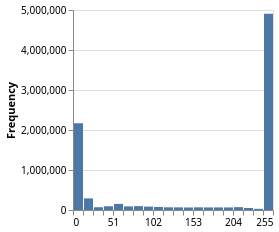

In [6]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.plot_chart(
    ge.Bbox(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time]
        )
)